In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
X = pd.DataFrame(data = iris.data, columns = iris.feature_names)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
target_names = iris.target_names
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
y = iris.target
y.shape

(150,)

Text(0, 0.5, 'sepal width (cm)')

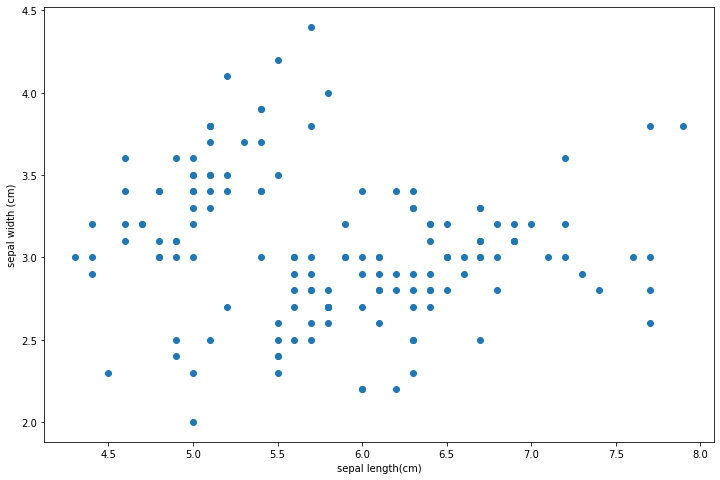

In [7]:
fig, ax = plt.subplots(figsize= (12,8))
plt.scatter(X['sepal length (cm)'], X['sepal width (cm)'])
plt.xlabel('sepal length(cm)')
plt.ylabel('sepal width (cm)')

Text(0, 0.5, 'iris type')

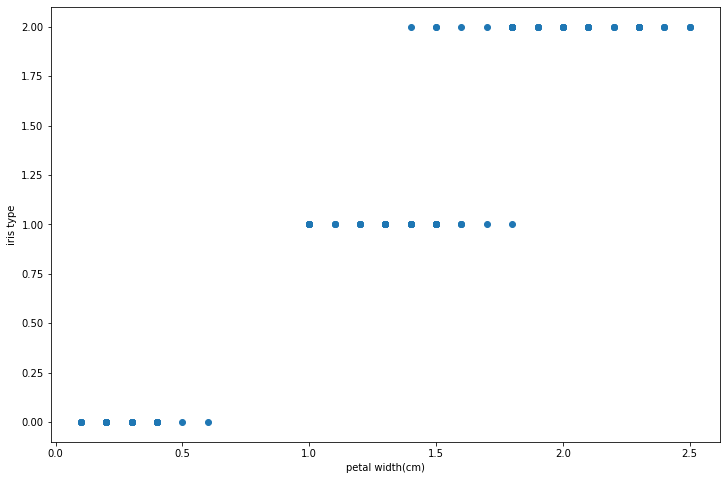

In [8]:
fig, ax = plt.subplots(figsize= (12,8))
plt.scatter(X['petal width (cm)'], pd.DataFrame(data = y))
plt.xlabel('petal width(cm)')
plt.ylabel('iris type')

Text(0, 0.5, 'iris type')

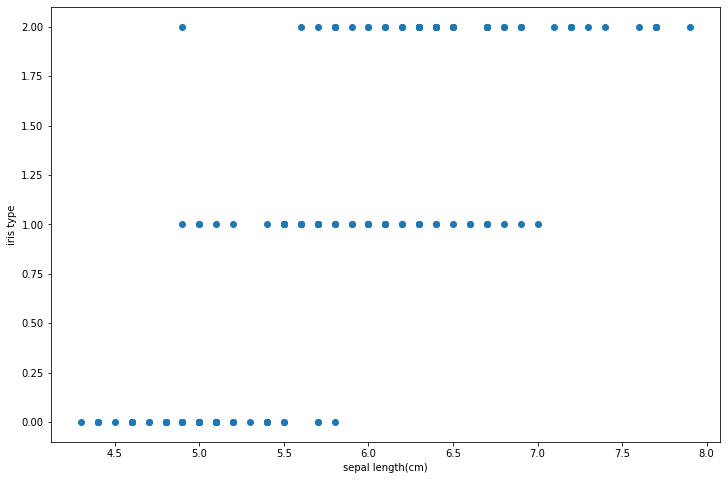

In [9]:
fig, ax = plt.subplots(figsize= (12,8))
plt.scatter(X['sepal length (cm)'], pd.DataFrame(data = y))
plt.xlabel('sepal length(cm)')
plt.ylabel('iris type')

In [10]:
iris_corr = X.corr()
iris_corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


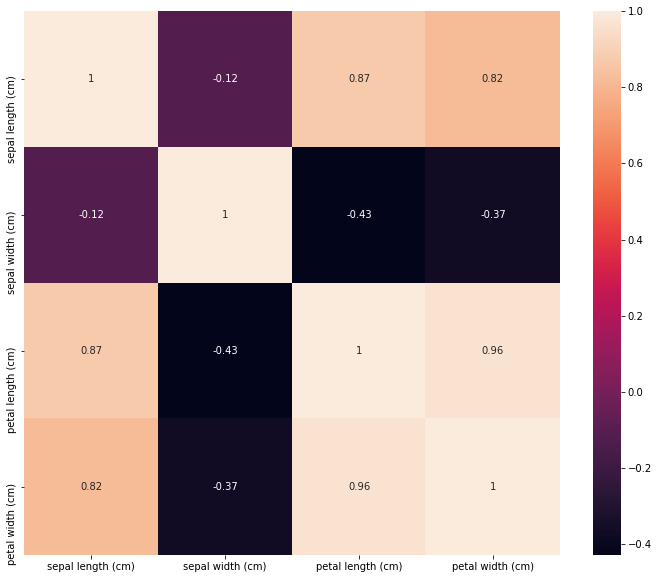

In [11]:
fig, ax = plt.subplots(figsize= (12,10))
sns.heatmap(iris_corr, annot = True)

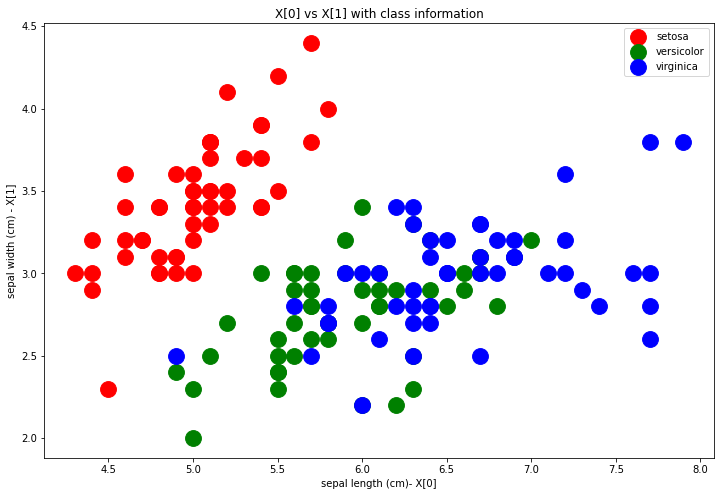

In [15]:
fig,ax = plt.subplots(figsize= (12,8))
x = np.array(X)

for c, i, target_name in zip('rgb', [0,1,2], target_names):
    plt.scatter(x[y == i, 0], x[y == i,1],
                c= c, s= 250,
                label= target_name)
    
plt.title('X[0] vs X[1] with class information')
plt.xlabel('sepal length (cm)- X[0]')
plt.ylabel('sepal width (cm) - X[1]')

plt.legend()
plt.show()

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components = 2)

In [17]:
X_new = lda.fit_transform(X, y)
lda.explained_variance_ratio_ #percentage of variance explained by each of selected components 

array([0.9912126, 0.0087874])

In [18]:
X_new.shape

(150, 2)

In [20]:
X_new = pd.DataFrame(X_new)
X_new.head()

,0,1
0,-8.061800,0.300421
1,-7.128688,-0.786660
2,-7.489828,-0.265384
3,-6.813201,-0.670631
4,-8.132309,0.514463


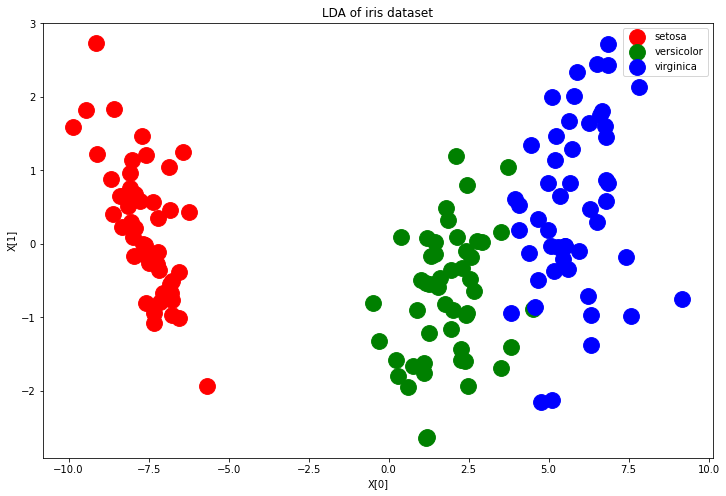

In [21]:
fig,ax = plt.subplots(figsize= (12,8))
x_new = np.array(X_new)

for c, i, target_name in zip('rgb', [0,1,2], target_names):
    plt.scatter(x_new[y == i, 0], x_new[y == i,1],
                c= c, s= 250,
                label= target_name)
    
plt.title('LDA of iris dataset')
plt.xlabel('X[0]')
plt.ylabel('X[1]')

plt.legend()
plt.show()

In [22]:
lda_corr = X_new.corr()
lda_corr

,0,1
0,1.000000e+00,8.406078e-16
1,8.406078e-16,1.000000e+00


In [23]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver= 'liblinear', multi_class = 'auto')
model.fit(X,y)
model.score(x,y)

0.96

In [24]:
model = LogisticRegression(solver= 'liblinear', multi_class = 'auto')
model.fit(X_new,y)
model.score(X_new,y)

0.9333333333333333